In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_loader import CovidDataLoader
from analysis import CovidAnalysis
from visualization import CovidVisualizer

## Initialize classes

In [2]:

loader = CovidDataLoader()
visualizer = CovidVisualizer()

In [3]:
# Download and load data
print("Downloading COVID-19 data...")
loader.download_data()

Downloaded confirmed data
Downloaded deaths data
Downloaded recovered data


In [4]:
print("Loading data...")
raw_data = loader.load_data()

Loading data...


In [5]:
print("Preprocessing data...")
processed_data = loader.preprocess_data(raw_data)

Preprocessing data...


c:\Users\Administrateur\Documents\Projects\Projects and Portfolio\Covid19_Analysis\notebooks\../src\data_loader.py:65: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df["Date"] = pd.to_datetime(melted_df["Date"])
c:\Users\Administrateur\Documents\Projects\Projects and Portfolio\Covid19_Analysis\notebooks\../src\data_loader.py:65: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df["Date"] = pd.to_datetime(melted_df["Date"])
c:\Users\Administrateur\Documents\Projects\Projects and Portfolio\Covid19_Analysis\notebooks\../src\data_loader.py:65: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, plea

In [6]:
print("Merging data...")
merged_data = loader.get_merged_data(processed_data)

Merging data...


### Initialize analysis

In [7]:

analyzer = CovidAnalysis(merged_data)

In [8]:
# Global summary
summary = analyzer.get_global_summary()
print("Global Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")

Global Summary:
Total_Confirmed: 676570149
Total_Deaths: 6881802
Total_Recovered: 0
Total_Active: 669688347
Global_Death_Rate: 1.02
Number_of_Countries: 201


In [9]:
# Top countries analysis
top_countries_cases = analyzer.get_top_countries_by_cases(10)
top_countries_death_rate = analyzer.get_top_countries_by_death_rate(10)


In [10]:
print("\nTop 10 Countries by Confirmed Cases:")
print(top_countries_cases)


Top 10 Countries by Confirmed Cases:
        Country/Region  Confirmed   Deaths  Recovered  Death_Rate
213740              US  103802702  1123836          0        1.08
92582            India   44690738   530779          0        1.19
73151           France   39866718   166176          0        0.42
77723          Germany   38249060   168935          0        0.44
28574           Brazil   37076053   699276          0        1.89
101726           Japan   33320438    72997          0        0.22
108584    Korea, South   30615522    34093          0        0.11
99440            Italy   25603510   188322          0        0.74
218312  United Kingdom   24658705   220721          0        0.90
169163          Russia   22075858   388478          0        1.76


In [11]:
print("\nTop 10 Countries by Death Rate (min 1000 cases):")
print(top_countries_death_rate)


Top 10 Countries by Death Rate (min 1000 cases):
                Country/Region  Confirmed  Deaths  Death_Rate
227456                   Yemen      11945    2159       18.07
194309                   Sudan      63829    5017        7.86
200024                   Syria      57467    3164        5.51
188594                 Somalia      27324    1361        4.98
162305                    Peru    4487553  219539        4.89
62864                    Egypt     515759   24812        4.81
134873                  Mexico    7483444  333188        4.45
26288   Bosnia and Herzegovina     401729   16280        4.05
1142               Afghanistan     209451    7896        3.77
117728                 Liberia       8090     295        3.65


### Visualizations

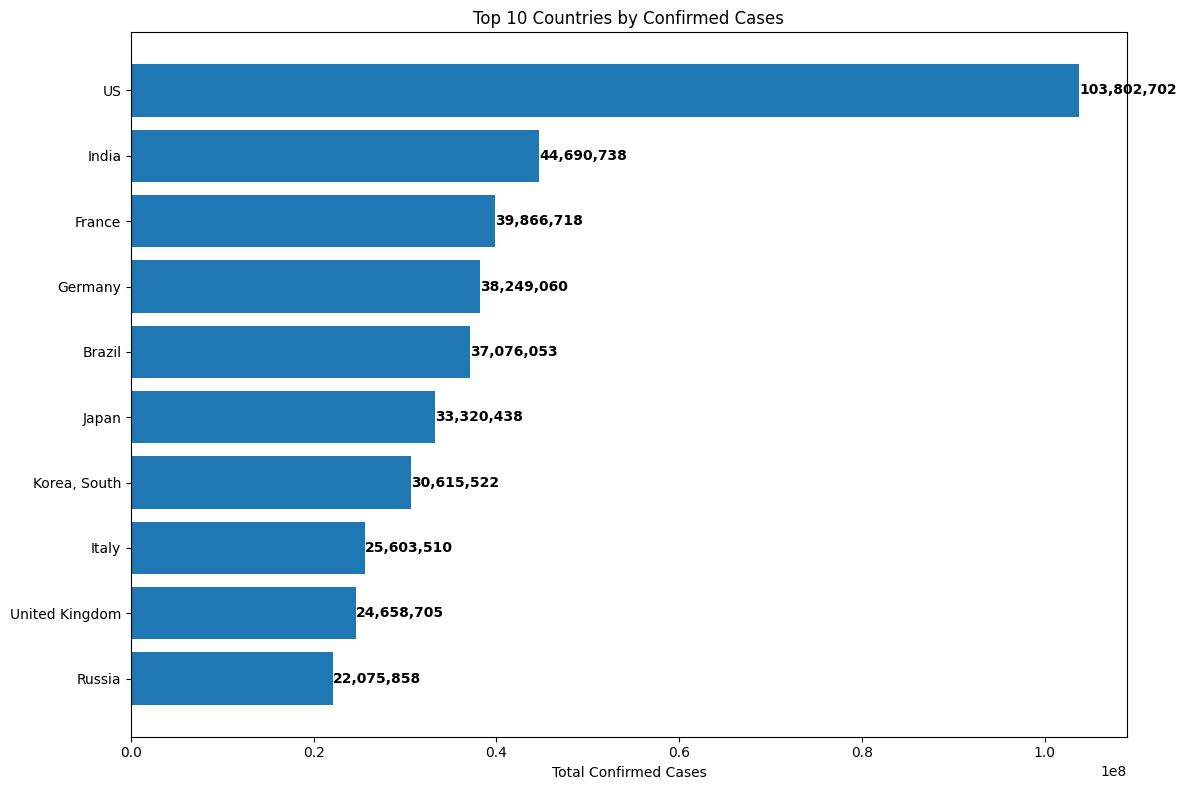

In [12]:
fig1 = visualizer.plot_top_countries(top_countries_cases, 'Confirmed', 'Confirmed Cases')
plt.show()

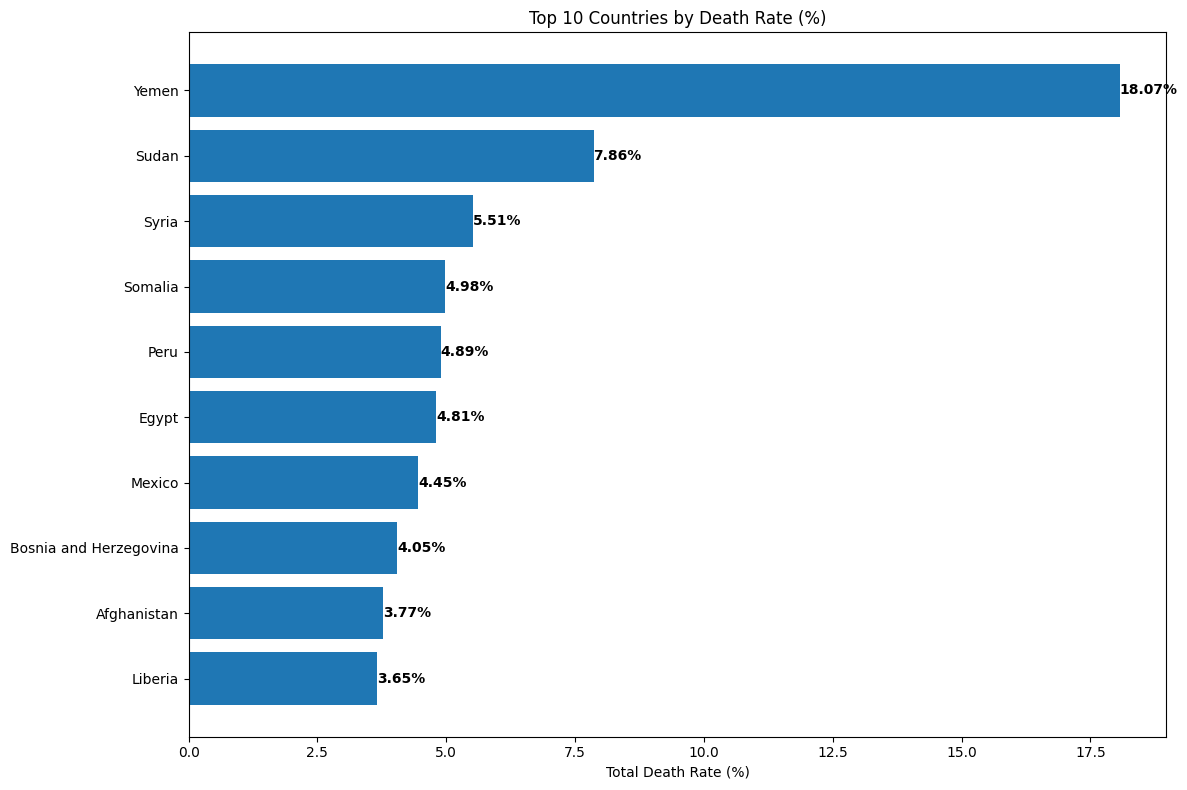

In [13]:
fig2 = visualizer.plot_top_countries(top_countries_death_rate, 'Death_Rate', 'Death Rate (%)')
plt.show()

In [14]:
# Interactive global map
map_fig = visualizer.plot_interactive_global_map(merged_data)
map_fig.show()
print("Data Exploration and analysis done!")

Data Exploration and analysis done!
